In [1]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.utils import shuffle
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import xgboost as xgb
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
configure_plotly_browser_state()

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\HP\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.shape

(1470, 35)

In [5]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
# Drop useless feat
df = df.drop(columns=['StandardHours', 
                          'EmployeeCount', 
                          'Over18',
                        ])

In [8]:
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1                        3  ...                 4                         4   
2                        4  ...                 3                         2   
3                        4  ...                 3                         3   
4                        1  ...                 3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 32 columns]

In [9]:
df.describe()

Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  PerformanceRating  RelationshipSatisfaction  \
count  1470.000000  ...        1470.000000               1470.000000   
mean      2.063946  ...           3.153741                  2.712245   
std       1.106940  ...           0.360824                  1.081209   
min       1.000000  ...           3.000000                  1.000000   
25%       1.000000  ...           3.000000                  2.000000   
50%       2.000000  ...           3.000000                  3.000000   
75%       3.000000  ...           3.000000                  4.000000   
max       5.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 25 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [11]:
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [12]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSince

# Exploratory Data

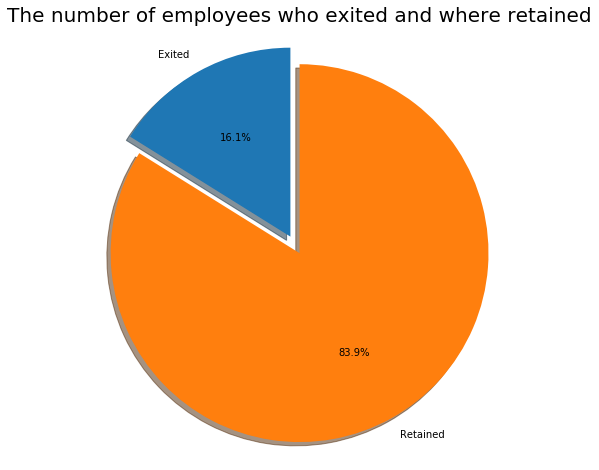

In [13]:
# Exploratory Data
#attrition data
#------------------pie cart---------------------------------
labels = 'Exited', 'Retained'
size= [df.Attrition[df['Attrition'] ==1].count(), 
       df.Attrition[df['Attrition']==0].count() ]
explode = (0, 0.1)
fig1, ax1  = plt.subplots(figsize=(10,8))
ax1.pie(size, explode=explode, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("The number of employees who exited and where retained", size =20)
plt.show()

In [14]:
attrition = df[(df['Attrition'] != 0)]
no_attrition = df[(df['Attrition'] == 0)]

In [15]:
def plot_distribution(var_select, bin_size):
  # calculate the correlation between the variable selected and the target
  corr = df['Attrition'].corr(df[var_select])
  corr = np.round(corr, 3)
  tmp1 = attrition[var_select]
  tmp2 = no_attrition[var_select]
  hist_data = [tmp1, tmp2]

  group_labels = ["Exited", "Retained"]
  colors = ['#FFD700', '#7EC0EE']
  fig = ff.create_distplot(hist_data, group_labels, colors=colors, show_hist=True,  curve_type='kde', bin_size=bin_size)

  fig['layout'].update(title = var_select+ ' '+'(corr_target =' + str (corr) + ')')
  py.iplot(fig, filename='Density Plot')

In [16]:
def plot_distribution(var_select, bin_size):
  # calculate the correlation between the variable selected and the target
  corr = df['Attrition'].corr(df[var_select])
  corr = np.round(corr, 3)
  tmp1 = attrition[var_select]
  tmp2 = no_attrition[var_select]
  hist_data = [tmp1, tmp2]

  group_labels = ["Exited", "Retained"]
  colors = ['#FFD700', '#7EC0EE']
  fig = ff.create_distplot(hist_data, group_labels, colors=colors, show_hist=True,  curve_type='kde', bin_size=bin_size)

  fig['layout'].update(title = var_select+ ' '+'(corr_target =' + str (corr) + ')')
  py.iplot(fig, filename='Density Plot')

In [17]:
def barplot(var_select, x_no_numeric) :
    tmp1 = df[(df['Attrition'] != 0)]
    tmp2 = df[(df['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(df[var_select],df['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Exited',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='Retained', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [18]:
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [19]:
#continous or numerical data 
plot_distribution('Age', False)
barplot('Age', False)
plot_distribution('DailyRate', 100)
plot_distribution('DistanceFromHome', False)
barplot('DistanceFromHome', False)
plot_distribution('HourlyRate', False)
plot_distribution('MonthlyIncome', 100)
plot_distribution('MonthlyRate', 100)
plot_distribution('NumCompaniesWorked', False)
barplot('NumCompaniesWorked',False)
plot_distribution('PercentSalaryHike', False)
barplot('PercentSalaryHike', False) 
plot_distribution('TotalWorkingYears', False)
barplot('TotalWorkingYears', False)
plot_distribution('TrainingTimesLastYear', False)
barplot('TrainingTimesLastYear',False)
plot_distribution('YearsAtCompany', False)
barplot('YearsAtCompany', False)
plot_distribution('YearsInCurrentRole', False)
barplot('YearsInCurrentRole', False)
plot_distribution('YearsSinceLastPromotion', False)
barplot('YearsSinceLastPromotion', False)
plot_distribution('YearsWithCurrManager', False)
barplot('YearsWithCurrManager', False)

In [20]:
def plot_pie(var_select) :
    
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white', 'lightpink']
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Employees Exited",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Employees Retained" )

    layout = go.Layout(dict(title = var_select + " distribution in employes attrition ",
                            annotations = [dict(text = "Exited",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Retained",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [21]:
# categorical data
plot_pie("Gender")
barplot('Gender',True)
plot_pie('OverTime')
barplot('OverTime',True)
plot_pie('BusinessTravel')
barplot('BusinessTravel',True)
plot_pie('JobRole')
barplot('JobRole',True)
plot_pie('Department') 
barplot('Department',True)
plot_pie('MaritalStatus') 
barplot('MaritalStatus',True)
plot_pie('EducationField') 
barplot('EducationField',True)
plot_pie('Education') 
barplot('Education',False)
plot_pie('EnvironmentSatisfaction')
barplot('EnvironmentSatisfaction',False)
plot_pie('JobInvolvement')
barplot('JobInvolvement', False)
plot_pie('JobLevel')
barplot('JobLevel',False)
plot_pie('JobSatisfaction')
barplot('JobSatisfaction',False)
plot_pie('PerformanceRating')
barplot('PerformanceRating',False)
plot_pie('RelationshipSatisfaction')
barplot('RelationshipSatisfaction', False)
plot_pie('StockOptionLevel')
barplot('StockOptionLevel', False)
plot_pie('WorkLifeBalance')
barplot('WorkLifeBalance', False)

# Feature Engineering and selection

In [22]:
df_train = df.sample(frac=0.75, random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

1102
368


In [23]:
# monthly income is being dropped due to it being similar to monthly rate
# Years at company is dropped due to being similar to years at current role
# distance from home is dropped not having a large impact on churn prediction
df_train.drop(columns=['Age','MonthlyIncome','YearsAtCompany'
                 ,'DistanceFromHome',
                 'NumCompaniesWorked'])
print("\n Missing values : ", df.isnull().values.sum())

df_test.drop(columns=['Age','MonthlyIncome','YearsAtCompany'
                 ,'DistanceFromHome',
                 'NumCompaniesWorked'])
print("\n Missing values : ", df.isnull().values.sum())



 Missing values :  0

 Missing values :  0


In [24]:
df_train.head()

Age  Attrition BusinessTravel  DailyRate              Department  \
388    42          0  Travel_Rarely        201  Research & Development   
262    32          0  Travel_Rarely        128  Research & Development   
904    48          0  Travel_Rarely        715  Research & Development   
87     51          0  Travel_Rarely        432  Research & Development   
1324   29          0  Travel_Rarely        726  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeNumber  \
388                  1          4     Life Sciences             517   
262                  2          1  Technical Degree             362   
904                  1          3     Life Sciences            1263   
87                   9          4     Life Sciences             116   
1324                29          1     Life Sciences            1859   

      EnvironmentSatisfaction  ... PerformanceRating  \
388                         2  ...                 3   
262                         4  ...                 3   
904                         4  ...                 3   
87                          4  ...                 4   
1324                        4  ...                 3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
388                          2                 1                  8   
262                          4                 0                  9   
904                          3                 0                 25   
87                           2                 2                 10   
1324                         4                 2                 11   

     TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
388                      5                3              5   
262                      5                3              6   
904                      3                4              1   
87                       4                3              4   
1324                     3                3              7   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
388                    2                        1                     2  
262                    2                        0                     4  
904                    0                        0                     0  
87                     2                        0                     3  
1324                   0                        1                     6  

[5 rows x 32 columns]

In [25]:
#Rearrange columns by data type for easier manipulation
continous_vars = ['Age','DailyRate','DistanceFromHome','HourlyRate',
                  'MonthlyIncome','MonthlyRate','NumCompaniesWorked',
                  'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear',
                  'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
                  'YearsWithCurrManager']
cat_vars = ['Gender','OverTime','BusinessTravel','JobRole','Department',
            'MaritalStatus','EducationField','Education','EnvironmentSatisfaction'
            ,'JobInvolvement','JobLevel','JobSatisfaction',
           'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']
df_train = df[["Attrition"] + continous_vars + cat_vars]
df_train.head()


Attrition  Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0          1   41       1102                 1          94           5993   
1          0   49        279                 8          61           5130   
2          1   37       1373                 2          92           2090   
3          0   33       1392                 3          56           2909   
4          0   27        591                 2          40           3468   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  ...  \
0        19479                   8                 11                  8  ...   
1        24907                   1                 23                 10  ...   
2         2396                   6                 15                  7  ...   
3        23159                   1                 11                  8  ...   
4        16632                   9                 12                  6  ...   

   EducationField  Education  EnvironmentSatisfaction  JobInvolvement  \
0   Life Sciences          2                        2               3   
1   Life Sciences          1                        3               2   
2           Other          2                        4               2   
3   Life Sciences          4                        4               3   
4         Medical          1                        1               3   

   JobLevel JobSatisfaction PerformanceRating RelationshipSatisfaction  \
0         2               4                 3                        1   
1         2               2                 4                        4   
2         1               3                 3                        2   
3         1               3                 3                        3   
4         1               2                 3                        4   

  StockOptionLevel WorkLifeBalance  
0                0               1  
1                1               3  
2                0               3  
3                0               3  
4                1               3  

[5 rows x 31 columns]

In [26]:
# one hot encoding categorical values 
lst = ['Gender','OverTime','BusinessTravel','JobRole','Department',
            'MaritalStatus','EducationField','Education','EnvironmentSatisfaction'
            ,'JobInvolvement','JobLevel','JobSatisfaction',
           'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

remove = list()
for i in lst:
    if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()


Attrition  Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0          1   41       1102                 1          94           5993   
1          0   49        279                 8          61           5130   
2          1   37       1373                 2          92           2090   
3          0   33       1392                 3          56           2909   
4          0   27        591                 2          40           3468   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  ...  \
0        19479                   8                 11                  8  ...   
1        24907                   1                 23                 10  ...   
2         2396                   6                 15                  7  ...   
3        23159                   1                 11                  8  ...   
4        16632                   9                 12                  6  ...   

   Department_Human Resources  MaritalStatus_Single  MaritalStatus_Married  \
0                          -1                     1                     -1   
1                          -1                    -1                      1   
2                          -1                     1                     -1   
3                          -1                    -1                      1   
4                          -1                    -1                      1   

   MaritalStatus_Divorced  EducationField_Life Sciences  EducationField_Other  \
0                      -1                             1                    -1   
1                      -1                             1                    -1   
2                      -1                            -1                     1   
3                      -1                             1                    -1   
4                      -1                            -1                    -1   

   EducationField_Medical  EducationField_Marketing  \
0                      -1                        -1   
1                      -1                        -1   
2                      -1                        -1   
3                      -1                        -1   
4                       1                        -1   

   EducationField_Technical Degree  EducationField_Human Resources  
0                               -1                              -1  
1                               -1                              -1  
2                               -1                              -1  
3                               -1                              -1  
4                               -1                              -1  

[5 rows x 52 columns]

In [27]:
# min maxing scaling continuous variables
# this is done to normalise the numerical data for better model fitting
minVec = df_train[continous_vars].min().copy()
maxVec = df_train[continous_vars].max().copy()
df_train[continous_vars] = (df_train[continous_vars]-minVec)/(maxVec-minVec)
df_train.head()




Attrition       Age  DailyRate  DistanceFromHome  HourlyRate  \
0          1  0.547619   0.715820          0.000000    0.914286   
1          0  0.738095   0.126700          0.250000    0.442857   
2          1  0.452381   0.909807          0.035714    0.885714   
3          0  0.357143   0.923407          0.071429    0.371429   
4          0  0.214286   0.350036          0.035714    0.142857   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
0       0.262454     0.698053            0.888889           0.000000   
1       0.217009     0.916001            0.111111           0.857143   
2       0.056925     0.012126            0.666667           0.285714   
3       0.100053     0.845814            0.111111           0.000000   
4       0.129489     0.583738            1.000000           0.071429   

   TotalWorkingYears  ...  Department_Human Resources  MaritalStatus_Single  \
0              0.200  ...                          -1                     1   
1              0.250  ...                          -1                    -1   
2              0.175  ...                          -1                     1   
3              0.200  ...                          -1                    -1   
4              0.150  ...                          -1                    -1   

   MaritalStatus_Married  MaritalStatus_Divorced  \
0                     -1                      -1   
1                      1                      -1   
2                     -1                      -1   
3                      1                      -1   
4                      1                      -1   

   EducationField_Life Sciences  EducationField_Other  EducationField_Medical  \
0                             1                    -1                      -1   
1                             1                    -1                      -1   
2                            -1                     1                      -1   
3                             1                    -1                      -1   
4                            -1                    -1                       1   

   EducationField_Marketing  EducationField_Technical Degree  \
0                        -1                               -1   
1                        -1                               -1   
2                        -1                               -1   
3                        -1                               -1   
4                        -1                               -1   

   EducationField_Human Resources  
0                              -1  
1                              -1  
2                              -1  
3                              -1  
4                              -1  

[5 rows x 52 columns]

In [28]:
df_train.head()

Attrition       Age  DailyRate  DistanceFromHome  HourlyRate  \
0          1  0.547619   0.715820          0.000000    0.914286   
1          0  0.738095   0.126700          0.250000    0.442857   
2          1  0.452381   0.909807          0.035714    0.885714   
3          0  0.357143   0.923407          0.071429    0.371429   
4          0  0.214286   0.350036          0.035714    0.142857   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
0       0.262454     0.698053            0.888889           0.000000   
1       0.217009     0.916001            0.111111           0.857143   
2       0.056925     0.012126            0.666667           0.285714   
3       0.100053     0.845814            0.111111           0.000000   
4       0.129489     0.583738            1.000000           0.071429   

   TotalWorkingYears  ...  Department_Human Resources  MaritalStatus_Single  \
0              0.200  ...                          -1                     1   
1              0.250  ...                          -1                    -1   
2              0.175  ...                          -1                     1   
3              0.200  ...                          -1                    -1   
4              0.150  ...                          -1                    -1   

   MaritalStatus_Married  MaritalStatus_Divorced  \
0                     -1                      -1   
1                      1                      -1   
2                     -1                      -1   
3                      1                      -1   
4                      1                      -1   

   EducationField_Life Sciences  EducationField_Other  EducationField_Medical  \
0                             1                    -1                      -1   
1                             1                    -1                      -1   
2                            -1                     1                      -1   
3                             1                    -1                      -1   
4                            -1                    -1                       1   

   EducationField_Marketing  EducationField_Technical Degree  \
0                        -1                               -1   
1                        -1                               -1   
2                        -1                               -1   
3                        -1                               -1   
4                        -1                               -1   

   EducationField_Human Resources  
0                              -1  
1                              -1  
2                              -1  
3                              -1  
4                              -1  

[5 rows x 52 columns]

# Data Preparation

In [52]:
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Reorder the columns
    continuous_vars = ['Age','DailyRate','DistanceFromHome','HourlyRate',
                  'MonthlyIncome','MonthlyRate','NumCompaniesWorked',
                  'PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear',
                  'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
                  'YearsWithCurrManager']
    cat_vars =  ['Gender','OverTime','BusinessTravel','JobRole','Department',
            'MaritalStatus','EducationField','Education','EnvironmentSatisfaction'
            ,'JobInvolvement','JobLevel','JobSatisfaction',
           'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']
    df_predict = df_predict[['Attrition'] + continuous_vars + cat_vars]
    """One hot encode the categorical variables
    lst = ['Gender','OverTime','BusinessTravel','JobRole','Department',
            'MaritalStatus','EducationField','Education','EnvironmentSatisfaction'
            ,'JobInvolvement','JobLevel','JobSatisfaction',
           'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    """
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

# Model fitting and Preparation

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [31]:
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
    
def get_auc_scores(y_actual, method, method2):
    auc_score = roc_auc_score(y_actual, method)
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2)
    return (auc_score, fpr_df, tpr_df)



In [32]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Attrition'],df_train.Attrition)
best_model(log_primal_Grid)

0.8843537414965986
{'C': 0.5, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)


In [33]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid ={'C': [0.1, 10, 50], 'max_iter': [300, 500], 'fit_intercept':[True], 'intercept_scaling':[1],'penalty':['l2'],
          'tol':[0.0001, 0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Attrition'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver ='liblinear'), param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2, df_train.Attrition)
best_model(log_pol2_Grid)



0.8489795918367348
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [34]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Attrition'],df_train.Attrition)
best_model(SVM_grid)

0.8755102040816327
{'C': 150, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True}
SVC(C=150, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [35]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Attrition'],df_train.Attrition)
best_model(SVM_grid)

0.8680272108843538
{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly', 'probability': True}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.01, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [36]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Attrition'],df_train.Attrition)
best_model(RanFor_grid)

0.863265306122449
{'max_depth': 8, 'max_features': 9, 'min_samples_split': 6, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [37]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Attrition'],df_train.Attrition)
best_model(xgb_grid)

0.8768707482993199
{'gamma': 0.01, 'learning_rate': 0.3, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 20}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


# Fit the best models

In [38]:
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='multinomial',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'Attrition'],df_train.Attrition)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)

In [39]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Attrition'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='multinomial', n_jobs=None, 
                              penalty='l2', random_state=None, solver='lbfgs',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df_train.Attrition)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Attrition'],df_train.Attrition)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [41]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df_train.loc[:, df_train.columns != 'Attrition'],df_train.Attrition)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [42]:

RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'Attrition'],df_train.Attrition)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(df_train.loc[:, df_train.columns != 'Attrition'],df_train.Attrition)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

# Model Train Accuracy predictions

In [44]:
print(classification_report(df_train.Attrition, log_primal.predict(df_train.loc[:, df_train.columns != 'Attrition'])))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1233
           1       0.77      0.46      0.58       237

    accuracy                           0.89      1470
   macro avg       0.84      0.72      0.76      1470
weighted avg       0.88      0.89      0.88      1470



In [45]:
print(classification_report(df_train.Attrition, log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1233
           1       1.00      1.00      1.00       237

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



In [46]:
print(classification_report(df_train.Attrition,  SVM_RBF.predict(df_train.loc[:, df_train.columns != 'Attrition'])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1233
           1       1.00      1.00      1.00       237

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



In [47]:
print(classification_report(df_train.Attrition,  SVM_POL.predict(df_train.loc[:, df_train.columns != 'Attrition'])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1233
           1       1.00      1.00      1.00       237

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



In [48]:
print(classification_report(df_train.Attrition, RF.predict(df_train.loc[:, df_train.columns != 'Attrition'])))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1233
           1       1.00      0.59      0.74       237

    accuracy                           0.93      1470
   macro avg       0.96      0.80      0.85      1470
weighted avg       0.94      0.93      0.93      1470



In [49]:
print(classification_report(df_train.Attrition, XGB.predict(df_train.loc[:, df_train.columns != 'Attrition'])))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1233
           1       0.95      0.49      0.64       237

    accuracy                           0.91      1470
   macro avg       0.93      0.74      0.80      1470
weighted avg       0.92      0.91      0.90      1470



In [50]:
y = df_train.Attrition
X = df_train.loc[:, df_train.columns != 'Attrition']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

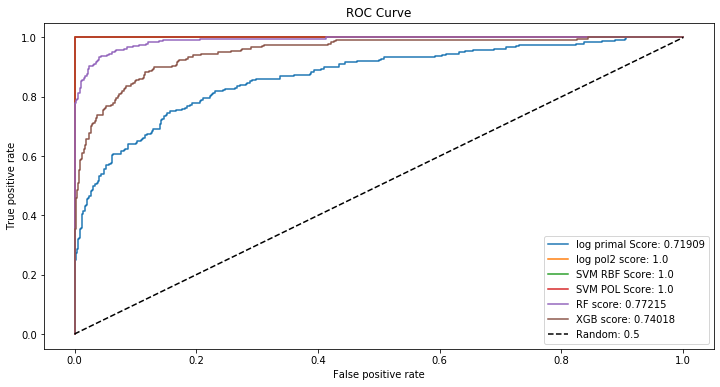

In [90]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [91]:
# random forest had the highest accuracy but the longest training time, while SVM RBF and SVM POL clearly overfitted

# Test data preparation, model fitting, and predicitions

In [54]:
#the categorical data has already been one hot encoded
#data prep
df_test = DfPrepPipeline(df_test,df_train.columns,minVec,maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.shape

KeyError: "['OverTime', 'EducationField', 'MaritalStatus', 'Gender', 'JobRole', 'Department', 'BusinessTravel'] not in index"

In [55]:
print(classification_report(df_test.Attrition,  RF.predict(df_test.loc[:, df_test.columns != 'Attrition'])))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       311
           1       1.00      0.14      0.25        57

    accuracy                           0.87       368
   macro avg       0.93      0.57      0.59       368
weighted avg       0.88      0.87      0.82       368



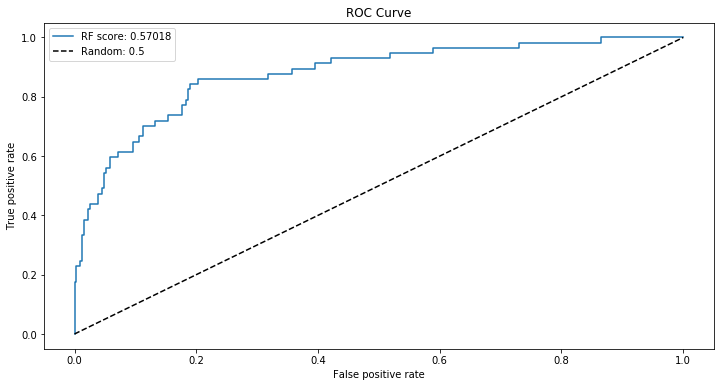

In [61]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(df_test.Attrition, RF.predict(df_test.loc[:, df_test.columns != 'Attrition']),
                                                       RF.predict_proba(df_test.loc[:, df_test.columns != 'Attrition'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()